## Settings & Check

In [ ]:
# 2. 필요한 라이브러리 설치
# %pip install -q kaggle

# 3. Kaggle API 설정
# import os

!which python
!pip show torch
import torch
print(torch.version.cuda) 
!echo $PATH
!echo $LD_LIBRARY_PATH

/home/gpu_04/.conda/envs/DL/bin/python
Name: torch
Version: 2.5.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /home/gpu_04/.conda/envs/DL/lib/python3.10/site-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: torchaudio, torchvision
12.1
/usr/local/cuda-12.2/bin:/usr/local/cuda-12.2/bin:/home/gpu_04/.conda/envs/DL/bin:/opt/anaconda3/condabin:/usr/local/cuda-12.2/bin:/usr/local/cuda-12.2/bin:/home/gpu_04/.conda/envs/DL/bin:/opt/anaconda3/condabin:/home/gpu_04/.vscode-server/cli/servers/Stable-f1a4fb101478ce6ec82fe9627c43efbf9e98c813/server/bin/rem

In [ ]:
import torch
print("PyTorch 버전:", torch.__version__)
print("CUDA 사용 가능 여부:", torch.cuda.is_available())
print("현재 디바이스:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")
print("CUDA 버전:", torch.version.cuda if torch.cuda.is_available() else "None")

# GPU 메모리 단편화 문제 완화
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# GPU 캐시 비우기
import torch
import gc

# 1. 불필요한 변수 삭제
# del variable

# 2. 가비지 컬렉터 실행
gc.collect()

# 3. PyTorch 캐시 메모리 해제
torch.cuda.empty_cache()

# 4. 메모리 사용 상태 출력
print(f"Allocated memory: {torch.cuda.memory_allocated() / (1024 ** 2):.2f} MB")
print(f"Reserved memory: {torch.cuda.memory_reserved() / (1024 ** 2):.2f} MB")

PyTorch 버전: 2.5.1+cu121
CUDA 사용 가능 여부: True
현재 디바이스: NVIDIA RTX A6000
CUDA 버전: 12.1


In [3]:
import os
import subprocess
import tensorflow as tf

# Kaggle API 설정
def setup_kaggle():
    kaggle_path = os.path.expanduser("./")
    kaggle_json_path = os.path.join(kaggle_path, "kaggle.json")

    # kaggle.json 파일이 있는지 확인하고 설정
    if not os.path.exists(kaggle_json_path):
        print("Kaggle API 키 파일(kaggle.json)을 ~/.kaggle에 배치해 주세요.")
        print("API 키는 https://www.kaggle.com/account > Create New API Token에서 다운로드할 수 있습니다.")
    else:
        os.makedirs(kaggle_path, exist_ok=True)  # .kaggle 디렉토리 생성
        os.chmod(kaggle_json_path, 0o600)  # kaggle.json 권한 설정
        print("Kaggle API 설정이 완료되었습니다.")

# 데이터셋 다운로드 및 압축 해제
def download_flickr30k():
    data_dir = "/home/gpu_04/jw2020/ImageCaptioning/flickr30k_data"
    os.makedirs(data_dir, exist_ok=True)

    # 다운로드할 경로로 이동
    os.chdir(data_dir)

    # Flickr8k 데이터셋 다운로드
    try:
        subprocess.run(["kaggle", "datasets", "download", "-d", "hsankesara/flickr-image-dataset"], check=True)
    except subprocess.CalledProcessError:
        print("Kaggle 데이터셋 다운로드에 실패했습니다. Kaggle API가 제대로 설정되었는지 확인하세요.")
        return None

    # 압축 해제
    try:
        subprocess.run(["unzip", "-q", "flickr-image-dataset.zip"], check=True)
        print(f"데이터가 {data_dir}에 다운로드되었습니다.")
    except subprocess.CalledProcessError:
        print("데이터셋 압축 해제에 실패했습니다.")

    return data_dir

# GPU 확인
def check_gpu():
    gpu_devices = tf.config.list_physical_devices('GPU')
    if gpu_devices:
        print(f"사용 가능한 GPU: {len(gpu_devices)}개")
        for gpu in gpu_devices:
            print(f"  - {gpu}")
        print("\nGPU 사용이 가능합니다!")
    else:
        print("GPU가 감지되지 않았습니다.")

# 실행 예시
if __name__ == "__main__":
    # Kaggle 설정
    setup_kaggle()

    # 데이터 다운로드
    data_dir = download_flickr30k()

    # GPU 확인
    check_gpu()

    print("\n모든 설정이 완료되었습니다!")


2024-11-22 00:59:14.083133: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732204754.105924 2282669 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732204754.112955 2282669 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-22 00:59:14.138935: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Kaggle API 키 파일(kaggle.json)을 ~/.kaggle에 배치해 주세요.
API 키는 https://www.kaggle.com/account > Create New API Token에서 다운로드할 수 있습니다.
Dataset URL: https://www.kaggle.com/datasets/hsankesara/flickr-image-dataset
License(s): CC0-1.0
flickr-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
데이터가 /home/gpu_04/jw2020/ImageCaptioning/flickr30k_data에 다운로드되었습니다.
사용 가능한 GPU: 1개
  - PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

GPU 사용이 가능합니다!

모든 설정이 완료되었습니다!


In [2]:
import pandas as pd

# caption file 경로
caption_file = "/home/gpu_04/jw2020/ImageCaptioning/flickr30k_data/results.csv"

# csv file load
captions = pd.read_csv(caption_file, sep='|', names=['image_name', 'comment_number', 'comment'], skiprows=1)

# 샘플 데이터 확인
print(captions.head())

       image_name  comment_number  \
0  1000092795.jpg               0   
1  1000092795.jpg               1   
2  1000092795.jpg               2   
3  1000092795.jpg               3   
4  1000092795.jpg               4   

                                             comment  
0   Two young guys with shaggy hair look at their...  
1   Two young , White males are outside near many...  
2   Two men in green shirts are standing in a yard .  
3       A man in a blue shirt standing in a garden .  
4            Two friends enjoy time spent together .  


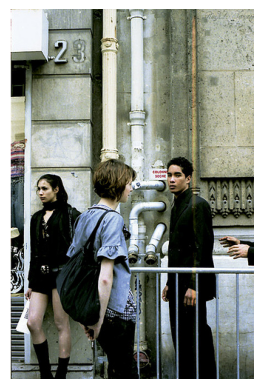

Caption 1:  An asian man wearing a black suit stands near a dark-haired woman and a brown-haired woman .
Caption 2:  Three people are standing outside near large pipes and a metal railing .
Caption 3:  A young woman walks past two young people dressed in hip black outfits .
Caption 4:  A woman with a large purse is walking by a gate .
Caption 5:  Several people standing outside a building .


In [3]:
from PIL import Image
import matplotlib.pyplot as plt

def display_image_with_caption(image_name):
    # 이미지 파일 경로
    image_path = f"/home/gpu_04/jw2020/ImageCaptioning/flickr30k_data/Images/{image_name}"

    # 이미지 열기
    img = Image.open(image_path)

    # 해당 이미지의 캡션 불러오기
    image_captions = captions[captions['image_name'] == image_name]['comment'].values

    # 이미지와 캡션 출력
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # 캡션 출력
    for i, caption in enumerate(image_captions):
        print(f"Caption {i+1}: {caption}")

# 이미지 파일 중 하나와 캡션을 출력해보기
sample_image = captions['image_name'].unique()[8]  # 첫 번째 이미지 파일명
display_image_with_caption(sample_image)

In [4]:
import os
os.chdir(os.path.join(os.getcwd(), "./ImageCaptioning/flickr30k_data"))
# os.chdir(os.path.join(os.getcwd()))
print("New working directory:", os.getcwd())


New working directory: /home/gpu_04/jw2020/ImageCaptioning/flickr30k_data


In [5]:
# 이미지 경로 설정
image_dir = '/home/gpu_04/jw2020/ImageCaptioning/flickr30k_data/Images/'
all_image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith('.jpg')]

## Data Preprocessing

In [ ]:
import torchvision.transforms as transforms
from PIL import Image
import os
import torch

# 이미지 전처리 함수
def image_preprocessing(image_paths):
    # preprocessing pipeline 정의
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    processed_images = []
    for i, image_path in enumerate(image_paths, 1):  # 인덱스 i로 반복 시작
        image = Image.open(image_path).convert('RGB')  # RGB 변환
        processed_image = preprocess(image)            # 전처리 적용
        processed_images.append(processed_image)

        # 1000개씩 처리 완료 시 진행 상황 출력
        if i % 1000 == 0:
            print(f"{i} images processed...")

    # 전처리 이미지를 텐서로 변환하여 저장
    processed_images_tensor = torch.stack(processed_images)
    return processed_images_tensor

# run image preprocessing
processed_images = image_preprocessing(all_image_paths)

# save processed images tensor
output_file = './processed_images.pt'
torch.save(processed_images, output_file)
print(f"Processed images saved to {output_file}")


Using device: cuda
1000 images processed...
2000 images processed...
3000 images processed...
4000 images processed...
5000 images processed...
6000 images processed...
7000 images processed...
8000 images processed...
9000 images processed...
10000 images processed...
11000 images processed...
12000 images processed...
13000 images processed...
14000 images processed...
15000 images processed...
16000 images processed...
17000 images processed...
18000 images processed...
19000 images processed...
20000 images processed...
21000 images processed...
22000 images processed...
23000 images processed...
24000 images processed...
25000 images processed...
26000 images processed...
27000 images processed...
28000 images processed...
29000 images processed...
30000 images processed...
31000 images processed...
Processed images saved to ./processed_images.pt


In [ ]:
import re
import os
import torch
import csv
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def preprocess_selected_captions(captions, max_length=30):
    # 1. 텍스트를 소문자로 변환
    lowered_captions = [caption.lower() for caption in captions]

    # 2. Keras Tokenizer를 사용 (기본 필터 유지)
    tokenizer = Tokenizer(oov_token='<UNK>')  # 기본 필터 사용
    tokenizer.fit_on_texts(lowered_captions)  # dictionary 생성

    # <sos>, <eos> Token을 vocabulary에 추가
    word_index = tokenizer.word_index
    word_index['<sos>'] = len(word_index) + 1
    word_index['<eos>'] = len(word_index) + 1

    sos_token = word_index['<sos>']
    eos_token = word_index['<eos>']

    # 3. 각 caption을 정수 시퀀스로 변환하고 시작/종료 토큰 추가
    caption_sequences = tokenizer.texts_to_sequences(lowered_captions)
    caption_sequences = [[sos_token] + seq + [eos_token] for seq in caption_sequences]

    # 4. 패딩 처리
    padded_captions = pad_sequences(caption_sequences, maxlen=max_length, padding='post', value=0)

    return padded_captions, word_index

# 캡션 파일 경로
caption_file = '/home/gpu_04/jw2020/ImageCaptioning/flickr30k_data/results.csv'

# 선택된 캡션 데이터
selected_image_names = set(os.path.basename(path) for path in all_image_paths)  # 사용자의 이미지 경로 리스트 필요
captions = []
with open(caption_file, 'r') as f:
    csv_reader = csv.reader(f, delimiter='|')  # '|' 구분자로 설정
    next(csv_reader)  # 헤더 건너뛰기
    for row in csv_reader:
        if len(row) == 3:  # 행에 정확히 3개의 열이 있는지 확인
            image_name, comment_number, comment = row[0].strip(), row[1].strip(), row[2].strip()
            if image_name in selected_image_names:  # 선택된 이미지에 해당하면
                captions.append(comment)  # comment(캡션)만 추가
        else:
            print(f"잘못된 행 건너뜀: {row}")


# 캡션 전처리            
padded_captions, word_index = preprocess_selected_captions(captions)

# 전처리된 캡션 데이터 저장
output_caption_file = './processed_captions.pt'
torch.save((padded_captions, word_index), output_caption_file)

# 결과 확인
print("전처리된 캡션 (패딩 포함):", padded_captions[:3])
print("단어 사전 크기:", len(word_index))
print("단어 인덱스 예시:", {word: word_index[word] for word in ['dog', '<sos>', '<eos>'] if word in word_index})

전처리된 캡션 (패딩 포함): [[18314    12    21   326    10  2038    88   187    16    62   159    23
    324    71     3     4   490 18315     0     0     0     0     0     0
      0     0     0     0     0     0]
 [18314    12    21    20   710    13    54    79   194  1427 18315     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [18314    12    29     3    46   223    13    31     3     2   490 18315
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]]
단어 사전 크기: 18315
단어 인덱스 예시: {'dog': 32, '<sos>': 18314, '<eos>': 18315}
0번 인덱스 단어: {}


## Implement of Model Structure

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader, random_split, TensorDataset
import psutil
import time

# GPU 사용 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# 데이터 불러오기
processed_images = torch.load('./processed_images.pt', map_location='cpu')  # 전처리된 이미지 텐서 리스트
padded_captions, word_index = torch.load('./processed_captions.pt', map_location='cpu')  # 전처리된 캡션과 단어 사전
vocab_size = len(word_index) + 1  # 단어 사전 크기 + padding

# ResNet50 모델 로드 및 특징 사전 추출
resnet50 = models.resnet50(pretrained=True)
resnet50 = torch.nn.Sequential(*list(resnet50.children())[:-1])  # Feature Extractor로 사용
resnet50 = resnet50.to(device)  # GPU로 이동
resnet50.eval()

# 데이터셋 생성
image_dataset = TensorDataset(processed_images)
image_loader = DataLoader(image_dataset, batch_size=32, shuffle=False)

# ResNet50 특징 추출
image_features = []
for batch in image_loader:
    images = batch[0].to(device)
    with torch.no_grad():
        features = resnet50(images).squeeze(-1).squeeze(-1).cpu()  # (batch_size, 2048)
        image_features.append(features)
        torch.cuda.empty_cache()  # 캐시 메모리 해제
image_features = torch.cat(image_features)  # 배치 결과 병합
torch.save(image_features, './image_features.pt')  # 저장

# 사전 추출된 ResNet특징 불러오기
image_features = torch.load('./image_features.pt')  # ResNet50 특징 텐서

# Dataset 클래스 수정
class ImageCaptionDataset(Dataset):
    def __init__(self, features, captions):
        self.features = features
        self.captions = captions

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        # 사전 추출된 ResNet 특징 사용
        return self.features[idx], torch.tensor(self.captions[idx], dtype=torch.long)

# Dataset 객체 생성
dataset = ImageCaptionDataset(image_features, padded_captions)

# 데이터셋 크기 계산
train_size = int(0.9 * len(dataset))  # 90% 학습 데이터
val_size = int(0.07 * len(dataset))   # 7% 검증 데이터
test_size = len(dataset) - train_size - val_size  # 나머지 3% 테스트 데이터

# 데이터셋 분리
torch.manual_seed(0)  # 항상 일정한 결과를 얻기 위해 시드 설정
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# DataLoader 초기화
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # 학습 데이터
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)     # 검증 데이터
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)   # 테스트 데이터

# 데이터셋 크기 출력
print(f"Total Dataset Size: {len(dataset)}")
print(f"Training Dataset Size: {len(train_dataset)}")
print(f"Validation Dataset Size: {len(val_dataset)}")
print(f"Test Dataset Size: {len(test_dataset)}")

# 2. Transformer 기반 이미지 캡셔닝 모델 정의
class ImageCaptioningTransformer(nn.Module):
    def __init__(self, feature_dim, embed_dim, num_heads, hidden_dim, vocab_size, num_layers, max_length):
        super(ImageCaptioningTransformer, self).__init__()
        
        self.feature_embed = nn.Linear(feature_dim, embed_dim)
        self.word_embedding = nn.Embedding(vocab_size, embed_dim)
        self.position_embedding = nn.Embedding(max_length, embed_dim)
        
        decoder_layer = nn.TransformerDecoderLayer(d_model=embed_dim, nhead=num_heads, dim_feedforward=hidden_dim)
        self.transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=num_layers)
        
        self.fc = nn.Linear(embed_dim, vocab_size)

    def forward(self, image_features, captions):
        batch_size, seq_len = captions.size()
        
        # 이미지 특징 임베딩 (2048 차원 -> embed_dim 차원)
        image_features = self.feature_embed(image_features).unsqueeze(1)  # (batch_size, 1, embed_dim)
        
        # 캡션 임베딩 및 위치 임베딩
        captions_embed = self.word_embedding(captions)  # (batch_size, seq_len, embed_dim)
        positions = torch.arange(0, seq_len).unsqueeze(0).expand(batch_size, seq_len).to(captions.device)
        captions_embed += self.position_embedding(positions)

        # Transformer 디코더에 이미지 특징과 마스크를 입력
        tgt_mask = self.generate_square_subsequent_mask(seq_len).to(captions.device)
        transformer_out = self.transformer_decoder(tgt=captions_embed.permute(1, 0, 2), 
                                                   memory=image_features.permute(1, 0, 2),
                                                   tgt_mask=tgt_mask)
        
        outputs = self.fc(transformer_out.permute(1, 0, 2))
        return outputs

    def generate_square_subsequent_mask(self, sz):
        mask = torch.triu(torch.ones(sz, sz), 1)
        mask = mask.masked_fill(mask == 1, float('-inf'))
        return mask

Using device: cuda


/tmp/ipykernel_3163372/3504784373.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  processed_images = torch.load('./processed_images.pt', map_location='cpu')  # 전처리된 이미지

Total Dataset Size: 31783
Training Dataset Size: 28604
Validation Dataset Size: 2224
Test Dataset Size: 955


In [ ]:
# 3. 모델 초기화 및 학습 설정
feature_dim = 2048  # ResNet50의 출력 차원
embed_dim = 128
num_heads = 4
hidden_dim = 512
num_layers = 2
# max_length = padded_captions.shape[1]
max_length = 30
learning_rate = 0.001

model = ImageCaptioningTransformer(feature_dim, embed_dim, num_heads, hidden_dim, vocab_size, num_layers, max_length)
model = model.to(device)  # GPU로 이동
criterion = nn.CrossEntropyLoss(ignore_index=0)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

## 기타

In [ ]:
import torch
import random
import numpy as np
from nltk.translate.bleu_score import sentence_bleu
import matplotlib.pyplot as plt

def evaluate_test_set(model, test_loader, word_index, device, num_display=10):
    model.eval()
    
    # word_index의 역매핑 생성
    index_to_word = {idx: word for word, idx in word_index.items()}
    
    all_bleu_scores = []
    test_examples = []
    
    with torch.no_grad():
        for batch_idx, (features, captions) in enumerate(test_loader):
            features = features.to(device)
            captions = captions.to(device)
            
            # 생성된 캡션과 실제 캡션 얻기
            batch_size = features.size(0)
            for i in range(batch_size):
                # 실제 캡션 디코딩 (패딩 제외)
                true_caption = [index_to_word[idx.item()] for idx in captions[i] if idx.item() != 0]
                true_caption = ' '.join(true_caption[1:-1])  # <sos>와 <eos> 제외
                
                # 캡션 생성
                generated_caption = generate_caption(model, features[i], word_index)
                
                # BLEU 점수 계산
                reference = [true_caption.split()]
                candidate = generated_caption.split()
                bleu_score = sentence_bleu(reference, candidate)
                all_bleu_scores.append(bleu_score)
                
                # 일부 예시 저장
                if len(test_examples) < num_display:
                    test_examples.append({
                        'generated': generated_caption,
                        'true': true_caption,
                        'bleu': bleu_score
                    })
    
    # 결과 출력
    avg_bleu = np.mean(all_bleu_scores)
    print(f"\nTest Set Evaluation:")
    print(f"Average BLEU Score: {avg_bleu:.4f}")
    
    # 예시 출력
    print("\nExample Generations:")
    for idx, example in enumerate(test_examples):
        print(f"\nExample {idx + 1}")
        print(f"Generated: {example['generated']}")
        print(f"True: {example['true']}")
        print(f"BLEU Score: {example['bleu']:.4f}")
    
    # BLEU 점수 분포 시각화
    plt.figure(figsize=(10, 5))
    plt.hist(all_bleu_scores, bins=50)
    plt.title('Distribution of BLEU Scores on Test Set')
    plt.xlabel('BLEU Score')
    plt.ylabel('Count')
    plt.show()
    
    return avg_bleu, all_bleu_scores

def generate_caption(model, image_feature, word_index, max_length=30):
    """한 이미지에 대한 캡션 생성"""
    model.eval()
    
    sos_token = word_index['<sos>']
    eos_token = word_index['<eos>']
    
    # 단어 인덱스를 단어로 변환하는 딕셔너리
    index_to_word = {idx: word for word, idx in word_index.items()}
    
    with torch.no_grad():
        caption_ids = [sos_token]
        for i in range(max_length):
            # 현재까지의 캡션을 텐서로 변환
            caption_tensor = torch.tensor([caption_ids], dtype=torch.long).to(device)
            
            # 다음 단어 예측
            output = model(image_feature.unsqueeze(0), caption_tensor)
            predicted_word_id = output[:, -1, :].argmax(dim=1).item()
            
            # 종료 토큰이 나오면 중단
            if predicted_word_id == eos_token:
                break
                
            caption_ids.append(predicted_word_id)
    
    # 캡션 디코딩 (<sos>와 <eos> 제외)
    caption = [index_to_word[idx] for idx in caption_ids[1:]]
    return ' '.join(caption)

In [ ]:
import logging
import time
import torch
from torch.amp import GradScaler, autocast

# 로깅 설정
logging.basicConfig(
    filename='training.log',  # 로그 파일 이름
    level=logging.INFO,  # 로그 수준
    format='%(asctime)s - %(levelname)s - %(message)s'  # 로그 포맷
)
logger = logging.getLogger()

def train_model(
    model, 
    train_loader, 
    val_loader, 
    num_epochs, 
    start_epoch=0, 
    loss_history=None, 
    accuracy_history=None, 
    val_loss_history=None, 
    val_accuracy_history=None
):
    """
    학습 함수 (Validation 포함)
    
    Args:
        model: 학습할 모델
        train_loader: DataLoader 객체 (학습 데이터)
        val_loader: DataLoader 객체 (검증 데이터)
        num_epochs: 총 에폭 수
        start_epoch: 학습 시작 에폭 (기본값: 0)
        loss_history: 이전 손실 기록 리스트 (기본값: None)
        accuracy_history: 이전 정확도 기록 리스트 (기본값: None)
        val_loss_history: 이전 Validation 손실 기록 리스트 (기본값: None)
        val_accuracy_history: 이전 Validation 정확도 기록 리스트 (기본값: None)
    
    Returns:
        loss_history: 업데이트된 학습 손실 기록 리스트
        accuracy_history: 업데이트된 학습 정확도 기록 리스트
        val_loss_history: 업데이트된 Validation 손실 기록 리스트
        val_accuracy_history: 업데이트된 Validation 정확도 기록 리스트
    """
    model.train()
    
    # 이전 기록이 없으면 빈 리스트로 초기화
    if loss_history is None:
        loss_history = []
    if accuracy_history is None:
        accuracy_history = []
    if val_loss_history is None:
        val_loss_history = []
    if val_accuracy_history is None:
        val_accuracy_history = []

    for epoch in range(start_epoch, num_epochs):
        # Training Metrics
        total_loss = 0
        correct_predictions = 0
        total_predictions = 0
        epoch_start = time.time()

        scaler = GradScaler()   # Mixed Precision Training 사용

        for image_features, captions in train_loader:
            image_features = image_features.to(device)
            captions = captions.to(device)

            with autocast(device_type='cuda'):  # Mixed Precision Training
                outputs = model(image_features, captions[:, :-1])
                loss = criterion(outputs.view(-1, vocab_size), captions[:, 1:].reshape(-1))
            
            optimizer.zero_grad()
            scaler.scale(loss).backward()   # Mixed Precision Training
            scaler.step(optimizer)  # Mixed Precision Training
            scaler.update()  # Mixed Precision Training

            total_loss += loss.item()
            
            # 정확도 계산
            predicted_tokens = outputs.argmax(-1)  # (batch_size, seq_len)
            correct_predictions += (predicted_tokens == captions[:, 1:]).sum().item()
            total_predictions += captions[:, 1:].numel()  # 총 단어 개수

        # 에폭 평균 손실 및 정확도 계산 (Training)
        avg_loss = total_loss / len(train_loader)
        accuracy = correct_predictions / total_predictions

        # 결과 저장
        loss_history.append(avg_loss)
        accuracy_history.append(accuracy)

        # Validation 평가
        val_loss, val_accuracy = evaluate_model(model, val_loader)
        val_loss_history.append(val_loss)
        val_accuracy_history.append(val_accuracy)

        epoch_end = time.time()
        # 로그 메시지 출력
        log_message = (f"Epoch [{epoch+1}/{num_epochs}], "
                       f"Train Loss: {avg_loss:.4f}, Train Acc: {accuracy:.4f}, "
                       f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}, "
                       f"Time: {epoch_end - epoch_start:.2f}s")
        logger.info(log_message)

        # GPU 사용량 로깅
        gpu_usage = log_gpu_usage()
        logger.info(gpu_usage)
        # print(f"Epoch [{epoch+1}/{num_epochs}], "
        #       f"Train Loss: {avg_loss:.4f}, Train Acc: {accuracy:.4f}, "
        #       f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}, "
        #       f"Time: {epoch_end - epoch_start:.2f}s")
        
        # # GPU 사용량 출력
        # log_gpu_usage()
        
        # !학습 Checkpoint 저장 (임시 - 50 단위로)---
        if (epoch + 1) % 30 == 0 or (epoch + 1) == 2:   # epoch 2는 잘 돌아가는 지 테스트용
            checkpoint = {
                'epoch': num_epochs,
                'model_state_dict': model.state_dict(),  # 모델 가중치
                'optimizer_state_dict': optimizer.state_dict(),  # Optimizer 상태
                'train_loss_history': loss_history,  # 학습 손실 기록
                'val_loss_history': val_loss_history,  # 검증 손실 기록
                'train_acc_history': accuracy_history,  # 학습 정확도 기록
                'val_acc_history': val_accuracy_history  # 검증 정확도 기록
            }
            file_name = f'check/checkpoint{epoch+1}_flickr8k_imgcap.pth'
            torch.save(checkpoint, file_name)
            print(f"Checkpoint saved successfully as {file_name}!")
        #!----

    return loss_history, accuracy_history, val_loss_history, val_accuracy_history

# validation evaluation 함수
def evaluate_model(model, val_loader):
    """
    Validation 평가 함수
    
    Args:
        model: 평가할 모델
        val_loader: 검증용 DataLoader 객체
    
    Returns:
        val_loss: 평균 Validation 손실
        val_accuracy: Validation 정확도
    """
    model.eval()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0
    
    with torch.no_grad():
        for image_features, captions in val_loader:
            image_features = image_features.to(device)
            captions = captions.to(device)
            
            outputs = model(image_features, captions[:, :-1])  # (batch_size, seq_len, vocab_size)
            loss = criterion(outputs.view(-1, vocab_size), captions[:, 1:].reshape(-1))
            total_loss += loss.item()
            
            # 정확도 계산
            predicted_tokens = outputs.argmax(-1)  # (batch_size, seq_len)
            correct_predictions += (predicted_tokens == captions[:, 1:]).sum().item()
            total_predictions += captions[:, 1:].numel()  # 총 단어 개수

    # 평균 Loss 및 Accuracy 계산
    val_loss = total_loss / len(val_loader)
    val_accuracy = correct_predictions / total_predictions

    model.train()  # 학습 모드로 복구
    return val_loss, val_accuracy

# GPU 모니터링 함수
def log_gpu_usage():
    if torch.cuda.is_available():
        gpu_memory = torch.cuda.memory_allocated(device) / (1024 ** 2)  # MB 단위
        gpu_max_memory = torch.cuda.max_memory_allocated(device) / (1024 ** 2)  # MB 단위
        gpu_load = torch.cuda.memory_reserved(device) / (1024 ** 2)  # 현재 예약된 메모리
        # print(f"GPU Memory Usage: {gpu_memory:.2f} MB, Max Memory: {gpu_max_memory:.2f} MB, Reserved: {gpu_load:.2f} MB")
        return f"GPU Memory Usage: {gpu_memory:.2f} MB, Max Memory: {gpu_max_memory:.2f} MB, Reserved: {gpu_load:.2f} MB"
    else:
        print("No GPU available.")


In [ ]:
# 학습 실행
num_epochs = 600
loss_history, accuracy_history, val_loss_history, val_accuracy_history = train_model(model, train_loader, val_loader, num_epochs)

Checkpoint saved successfully as check/checkpoint2_flickr8k_imgcap.pth!


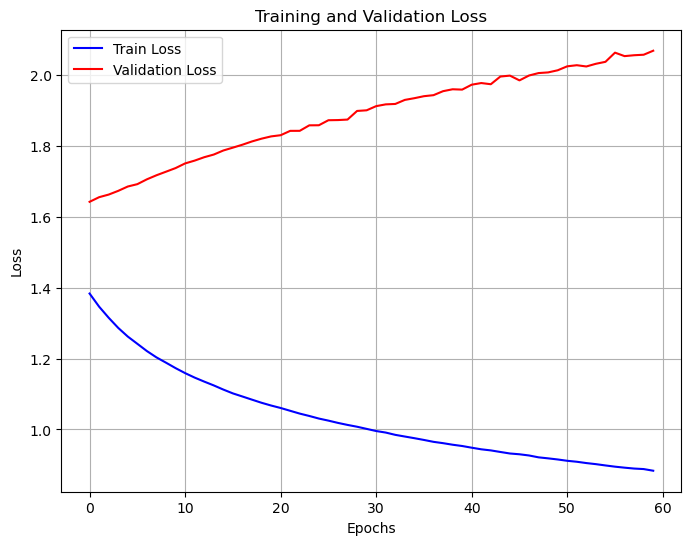

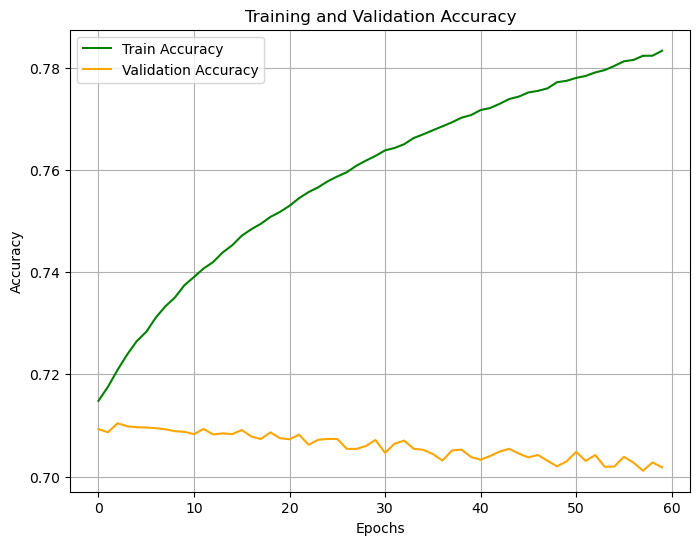

In [17]:
import matplotlib.pyplot as plt

# Loss 그래프
plt.figure(figsize=(8, 6))
plt.plot(loss_history, label='Train Loss', color='blue')
plt.plot(val_loss_history, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy 그래프
plt.figure(figsize=(8, 6))
plt.plot(accuracy_history, label='Train Accuracy', color='green')
plt.plot(val_accuracy_history, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# print top 5 of validation loss and accuracy and their indices
val_loss_history_tensor = torch.tensor(val_loss_history)
val_accuracy_history_tensor = torch.tensor(val_accuracy_history)
top_val_loss, top_val_loss_indices = torch.topk(val_loss_history_tensor, 5, largest=False)
top_val_accuracy, top_val_accuracy_indices = torch.topk(val_accuracy_history_tensor, 5, largest=True)
print("Top 5 Validation Loss:", top_val_loss, top_val_loss_indices)
print("Top 5 Validation Accuracy:", top_val_accuracy, top_val_accuracy_indices)

Top 5 Validation Loss: tensor([1.6427, 1.6558, 1.6631, 1.6736, 1.6859]) tensor([0, 1, 2, 3, 4])
Top 5 Validation Accuracy: tensor([0.7104, 0.7098, 0.7097, 0.7096, 0.7095]) tensor([2, 3, 4, 5, 6])


## 학습된 모델 저장 / epoch 늘려 이어서 학습

In [26]:
# 학습된 모델의 가중치 저장
torch.save(model.state_dict(), 'flickr8k_ImgCap_50epoch.pth')
print("Model saved successfully!")

Model saved successfully!


In [ ]:
# 학습 Checkpoint 저장
checkpoint = {
    'epoch': num_epochs,
    'model_state_dict': model.state_dict(),  # 모델 가중치
    'optimizer_state_dict': optimizer.state_dict(),  # Optimizer 상태
    'train_loss_history': loss_history,      # history
    'val_loss_history': val_loss_history, 
    'train_acc_history': accuracy_history,
    'val_acc_history': val_accuracy_history 
}
file_name = 'checkpoint50_flickr8k_imgcap.pth'
torch.save(checkpoint, file_name)
print(f"Checkpoint saved successfully as {file_name}!")

Checkpoint saved successfully!


In [12]:
import torch
# 체크포인트 불러오기
checkpoint = torch.load('/home/gpu_04/jw2020/ImageCaptioning/flickr30k_data/check/checkpoint60_flickr8k_imgcap.pth')
model.load_state_dict(checkpoint['model_state_dict'])  # model weight
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])  # Optimizer
start_epoch = checkpoint['epoch']   # epoch number
loss_history = checkpoint['train_loss_history'] 
accuracy_history = checkpoint['train_acc_history'] 
val_loss_history = checkpoint['val_loss_history']  
val_accuracy_history = checkpoint['val_acc_history'] 

print(f"Checkpoint loaded. Starting from epoch {start_epoch + 1}")


Checkpoint loaded. Starting from epoch 601


/tmp/ipykernel_3163372/3619113274.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('/home/gpu_04/jw2020/ImageCaptioning/flickr30k_data/check/check

In [ ]:
# 이어서 학습 수행
num_epochs = 100  # 총 에폭 수
loss_history, accuracy_history, val_loss_history, val_accuracy_history = train_model(
    model, 
    train_loader,
    val_loader,
    num_epochs, 
    start_epoch=start_epoch,  # 이어서 학습 시작
    loss_history=loss_history,  # 기존 history들 가져와 업데이트
    accuracy_history=accuracy_history,
    val_loss_history=val_loss_history, 
    val_accuracy_history=val_accuracy_history 
)

Epoch [51/100], Loss: 0.6864, Accuracy: 0.8021, Time: 44.93s
GPU Memory Usage: 9632.02 MB, Max Memory: 14316.47 MB, Reserved: 18666.00 MB
Epoch [52/100], Loss: 0.6853, Accuracy: 0.8031, Time: 44.97s
GPU Memory Usage: 9632.02 MB, Max Memory: 14316.47 MB, Reserved: 18666.00 MB
Epoch [53/100], Loss: 0.6795, Accuracy: 0.8046, Time: 44.98s
GPU Memory Usage: 9632.02 MB, Max Memory: 14316.47 MB, Reserved: 18666.00 MB
Epoch [54/100], Loss: 0.6708, Accuracy: 0.8063, Time: 44.53s
GPU Memory Usage: 9632.02 MB, Max Memory: 14316.47 MB, Reserved: 18666.00 MB
Epoch [55/100], Loss: 0.6651, Accuracy: 0.8080, Time: 43.45s
GPU Memory Usage: 9632.02 MB, Max Memory: 14316.47 MB, Reserved: 18666.00 MB
Epoch [56/100], Loss: 0.6599, Accuracy: 0.8089, Time: 44.47s
GPU Memory Usage: 9632.02 MB, Max Memory: 14316.47 MB, Reserved: 18666.00 MB
Epoch [57/100], Loss: 0.6544, Accuracy: 0.8103, Time: 43.78s
GPU Memory Usage: 9632.02 MB, Max Memory: 14316.47 MB, Reserved: 18666.00 MB
Epoch [58/100], Loss: 0.6535, Accu

## 학습된 모델 평가 및 예시 실행 파트

In [26]:
%pip install -q nltk

Note: you may need to restart the kernel to use updated packages.


Starting test set evaluation...

Test Set Evaluation:
Average BLEU Score: 0.0036


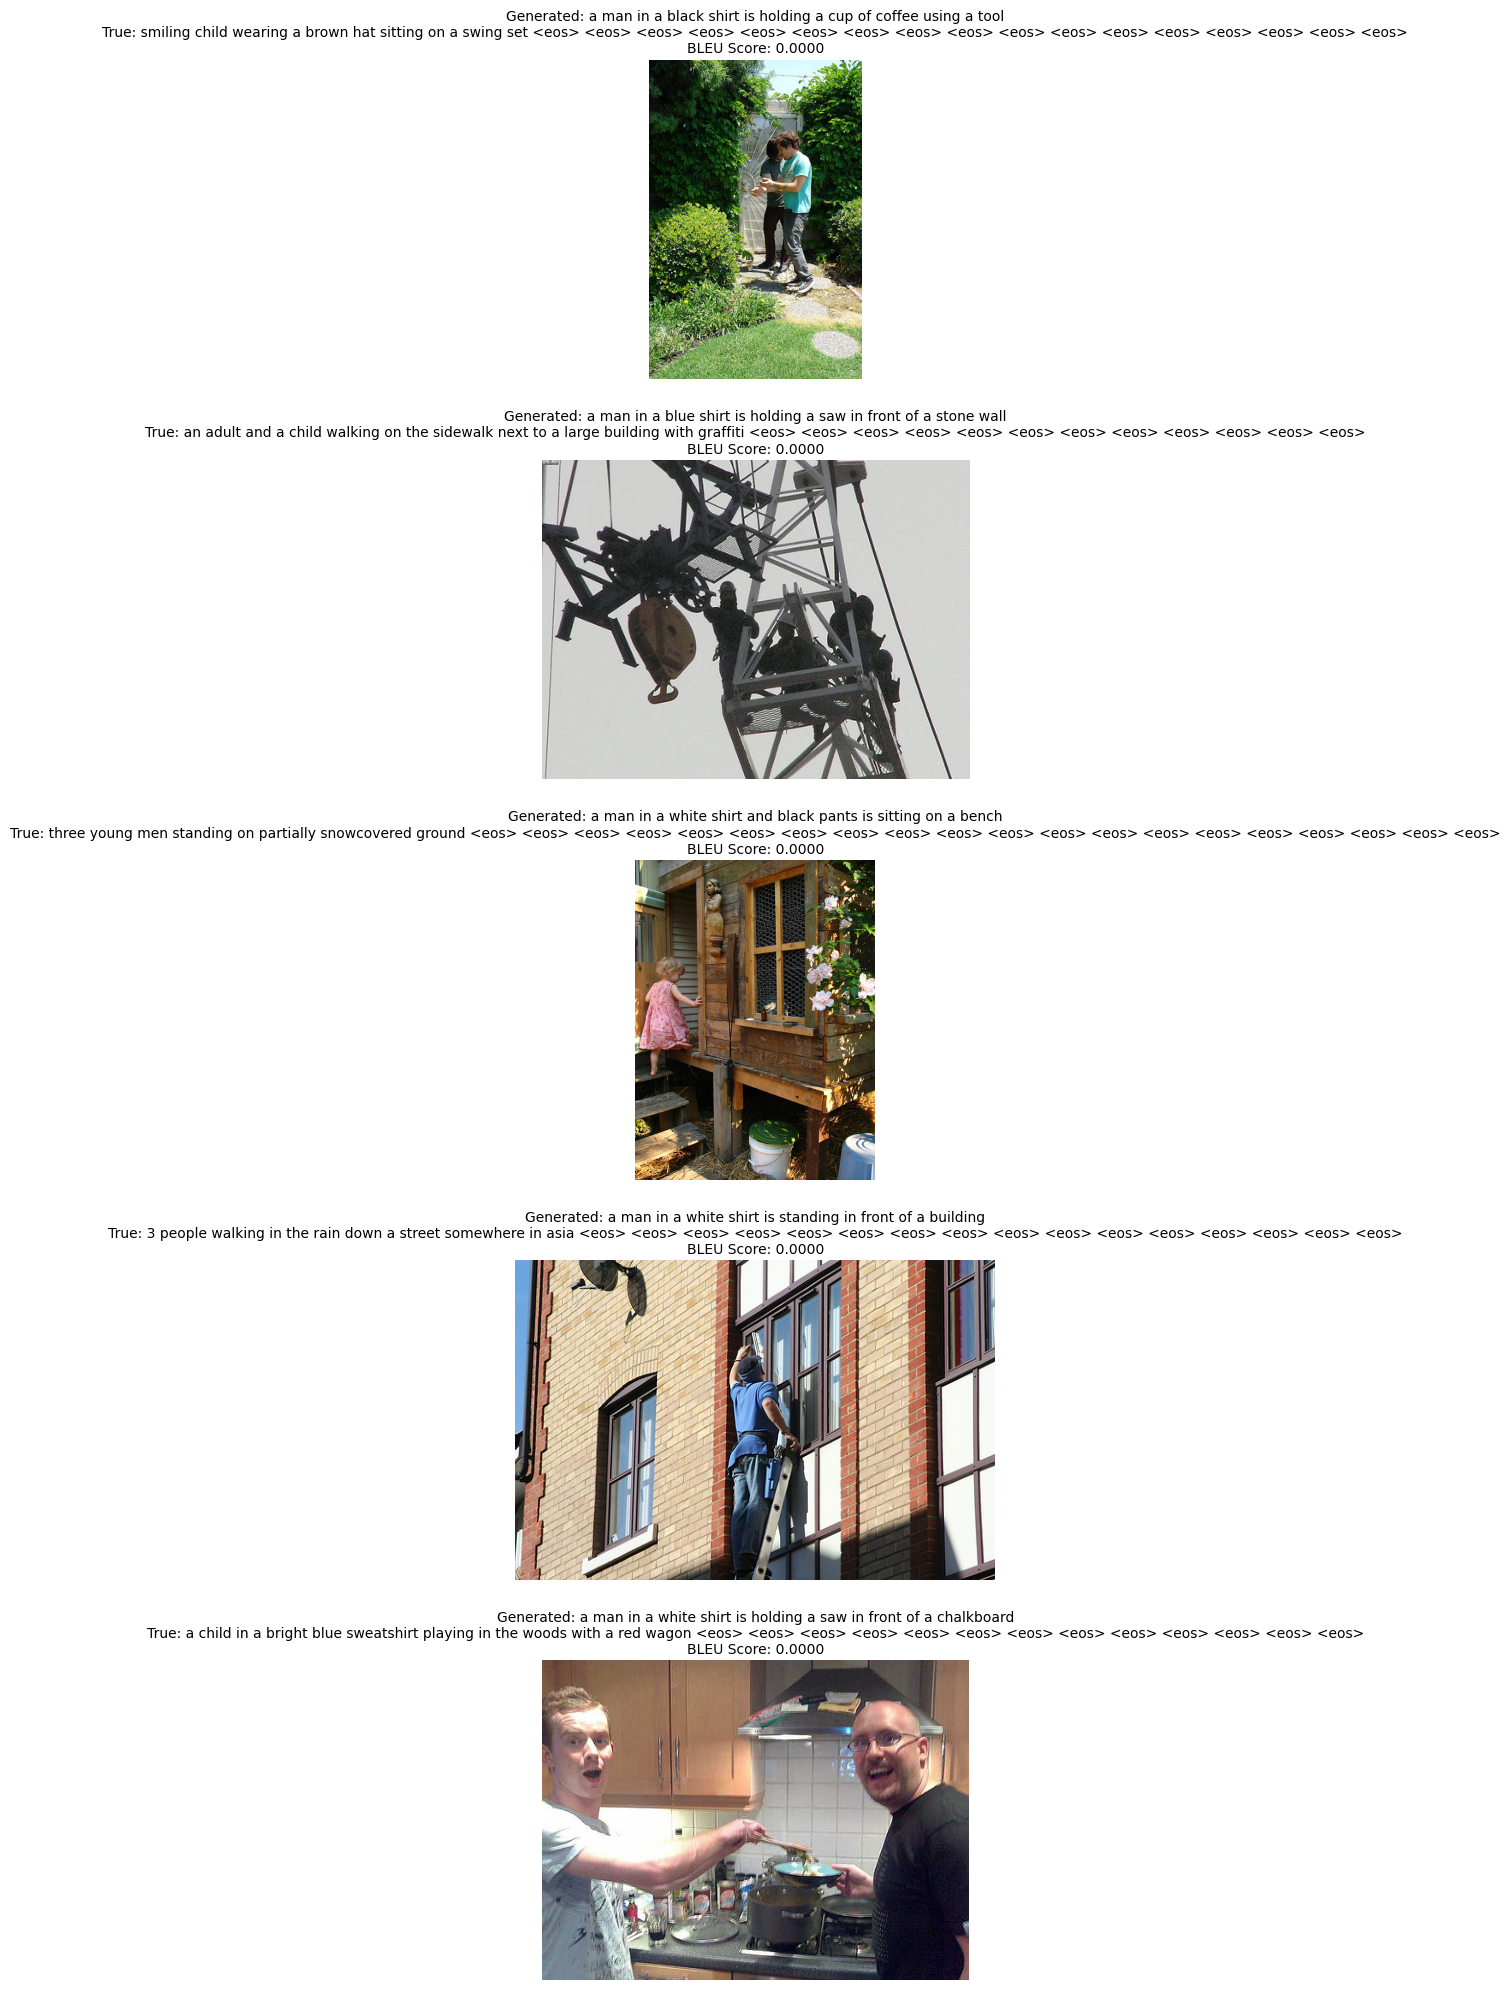

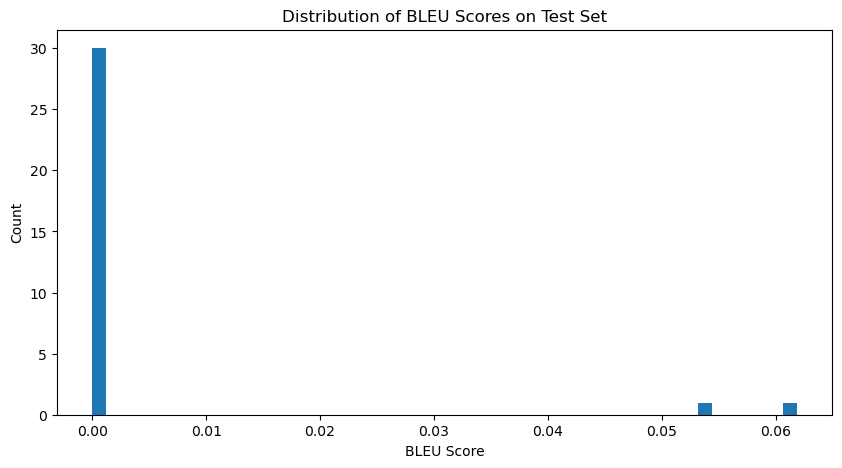

In [15]:
import torch
import random
import numpy as np
from nltk.translate.bleu_score import sentence_bleu
import matplotlib.pyplot as plt
from PIL import Image
import os

def evaluate_and_visualize(model, test_loader, word_index, device, image_dir, num_display=5):
    model.eval()
    
    # word_index의 역매핑 생성
    index_to_word = {idx: word for word, idx in word_index.items()}
    
    all_bleu_scores = []
    test_examples = []
    
    with torch.no_grad():
        for batch_idx, (features, captions) in enumerate(test_loader):
            features = features.to(device)
            captions = captions.to(device)
            
            batch_size = features.size(0)
            for i in range(batch_size):
                # 실제 캡션 디코딩 (패딩 제외)
                true_caption = [index_to_word[idx.item()] for idx in captions[i] if idx.item() != 0]
                true_caption = ' '.join(true_caption[1:-1])  # <sos>와 <eos> 제외
                
                # 캡션 생성
                generated_caption = generate_caption(model, features[i], word_index)
                
                # BLEU 점수 계산
                reference = [true_caption.split()]
                candidate = generated_caption.split()
                bleu_score = sentence_bleu(reference, candidate)
                all_bleu_scores.append(bleu_score)
                
                # 예시 저장
                if len(test_examples) < num_display:
                    # batch_idx와 i를 사용하여 이미지 파일명 또는 인덱스를 결정
                    image_idx = batch_idx * test_loader.batch_size + i
                    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])
                    image_path = os.path.join(image_dir, image_files[image_idx])
                    
                    test_examples.append({
                        'image_path': image_path,
                        'generated': generated_caption,
                        'true': true_caption,
                        'bleu': bleu_score
                    })
            
            if len(test_examples) >= num_display:
                break
    
    # 결과 출력 및 시각화
    avg_bleu = np.mean(all_bleu_scores)
    print(f"\nTest Set Evaluation:")
    print(f"Average BLEU Score: {avg_bleu:.4f}")
    
    # 이미지와 캡션 시각화
    fig = plt.figure(figsize=(15, 4*num_display))
    for idx, example in enumerate(test_examples):
        ax = fig.add_subplot(num_display, 1, idx+1)
        
        # 이미지 로드 및 표시
        img = Image.open(example['image_path'])
        ax.imshow(img)
        ax.axis('off')
        
        # 캡션 표시
        plt.title(f"Generated: {example['generated']}\nTrue: {example['true']}\nBLEU Score: {example['bleu']:.4f}",
                 fontsize=10, wrap=True)
    
    plt.tight_layout()
    plt.show()
    
    # BLEU 점수 분포 시각화
    plt.figure(figsize=(10, 5))
    plt.hist(all_bleu_scores, bins=50)
    plt.title('Distribution of BLEU Scores on Test Set')
    plt.xlabel('BLEU Score')
    plt.ylabel('Count')
    plt.show()
    
    return avg_bleu, all_bleu_scores

# 테스트 실행
image_dir = '/home/gpu_04/jw2020/ImageCaptioning/flickr30k_data/Images/'  # 이미지 디렉토리 경로
print("Starting test set evaluation...")
avg_bleu, bleu_scores = evaluate_and_visualize(model, test_loader, word_index, device, image_dir)